## Title

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import ROOT

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.chdir(ROOT)

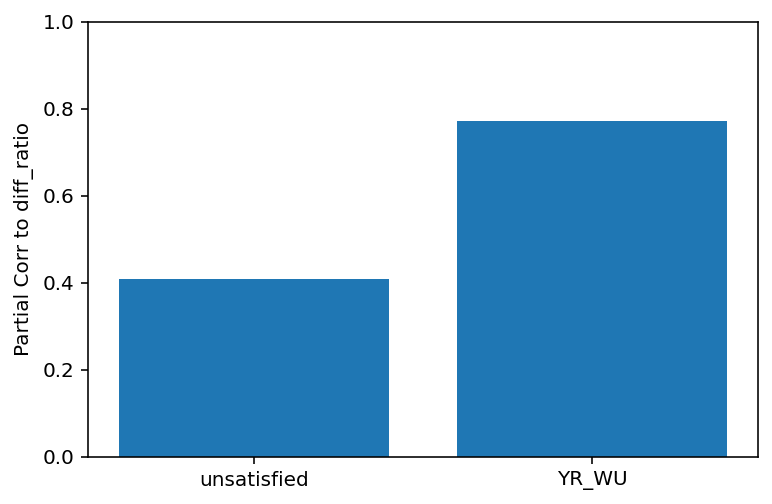

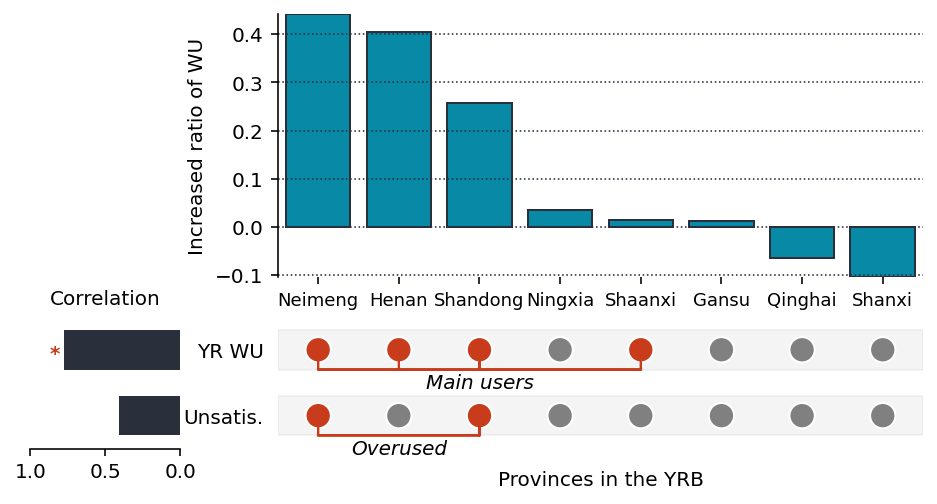

In [18]:
from func.handle import ExpResultsHandler

YAML_87 = "reports/n1987/87_all_wci.yaml"
exp87 = ExpResultsHandler(yaml_file=YAML_87)
exp87.load_from_pickle()

statistic = exp87.get_statistic_df()

xs = ['unsatisfied', 'YR_WU']
corrs, p_vals = exp87.correlation_analysis(xs=['unsatisfied', 'YR_WU'], y='diff_ratio')
bools = [
    statistic['YR_WU'] > statistic['scheme87'], 
    statistic['YR_WU'] > statistic['YR_WU'].median(),
]
notes = ['test1', 'test2']

items = list(zip(['Unsatis.', 'YR WU'], bools, ['Overused', 'Main users'], corrs, p_vals))
exp87.plot_upset(items)
plt.savefig("figs/outputs/upset.jpg", dpi=300)
plt.show();